In [46]:
# Let's import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [47]:
warnings.filterwarnings('ignore')

In [48]:
# Visualisation settings
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [ ]:
# VLet's load the data set
df = pd.read_excel('Talent_Academy_Case_DT_2025.xlsx')

In [50]:
print("DATA SET GENERAL INFORMATION")
print("="*50)
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(df.head())
print()
print(df.info())
print()
print(df.describe())

DATA SET GENERAL INFORMATION
Number of rows: 2235
Number of columns: 13
   HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
0   145134   60    Kadın    0 Rh+  Türkiye   
1   145135   28    Erkek    0 Rh+  Türkiye   
2   145135   28    Erkek    0 Rh+  Türkiye   
3   145135   28    Erkek    0 Rh+  Türkiye   
4   145135   28    Erkek    0 Rh+  Türkiye   

                                      KronikHastalik  \
0  Becker Musküler Distrofisi, Hiportiroidizm, Ka...   
1  Duchenne Musküler Distrofisi, Myastenia gravis...   
2  Duchenne Musküler Distrofisi, Myastenia gravis...   
3  Duchenne Musküler Distrofisi, Myastenia gravis...   
4  Duchenne Musküler Distrofisi, Myastenia gravis...   

                                            Bolum Alerji  \
0  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    TOZ   
1  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   
2  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   
3  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   
4  Fiziksel Tı

TARGET VARIABLE ANALYSIS: Treatment Duration
TedaviSuresi their unique value:
TedaviSuresi
1 Seans        3
10 Seans     175
11 Seans       9
14 Seans       2
15 Seans    1670
16 Seans      27
17 Seans      36
18 Seans      20
19 Seans      10
2 Seans       45
20 Seans     113
21 Seans      20
22 Seans       5
25 Seans       5
29 Seans       5
3 Seans        7
30 Seans      12
37 Seans       5
4 Seans       35
5 Seans       17
6 Seans        3
7 Seans        5
8 Seans        6
Name: count, dtype: int64

Examples of TreatmentSurah:
['5 Seans', '15 Seans', '15 Seans', '15 Seans', '15 Seans', '15 Seans', '10 Seans', '10 Seans', '10 Seans', '15 Seans']

Numerical statistics of the Treatment Period:
count    2235.000000
mean       14.570917
std         3.725322
min         1.000000
25%        15.000000
50%        15.000000
75%        15.000000
max        37.000000
Name: TedaviSuresi_Sayi, dtype: float64



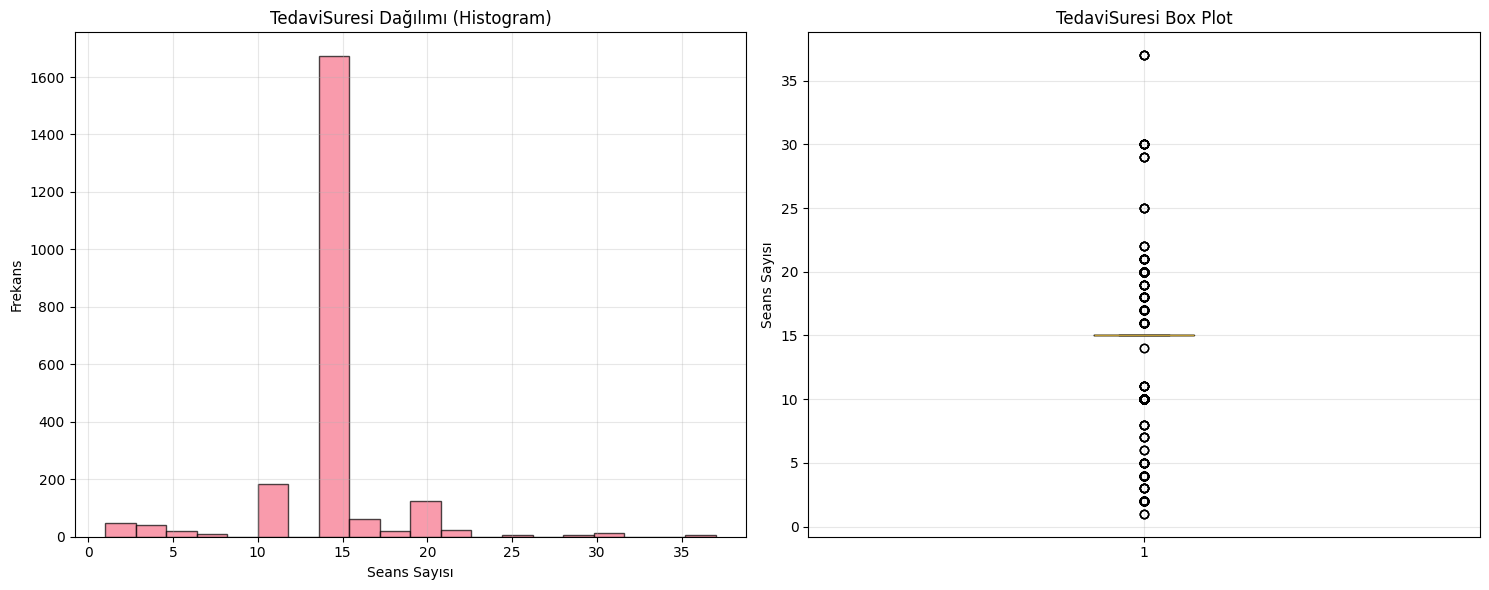

Minimum sessions: 1
Maximum sessions: 37
Average session: 14.57
Median session: 15.0


In [51]:
# Let's examine our target variable in detail
print("TARGET VARIABLE ANALYSIS: Treatment Duration")
print("="*50)

# Let's see the unique values in the TreatmentTerm column
print("TedaviSuresi their unique value:")
tedavi_counts = df['TedaviSuresi'].value_counts().sort_index()
print(tedavi_counts)
print()

# To convert TreatmentSuresi to numeric format, let's first examine its format
print("Examples of TreatmentSurah:")
print(df['TedaviSuresi'].head(10).tolist())
print()

# Let's subtract the number of sessions
df['TedaviSuresi_Sayi'] = df['TedaviSuresi'].str.extract('(\d+)').astype(int)

print("Numerical statistics of the Treatment Period:")
print(df['TedaviSuresi_Sayi'].describe())
print()

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
axes[0].hist(df['TedaviSuresi_Sayi'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_title('TedaviSuresi Dağılımı (Histogram)')
axes[0].set_xlabel('Seans Sayısı')
axes[0].set_ylabel('Frekans')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['TedaviSuresi_Sayi'])
axes[1].set_title('TedaviSuresi Box Plot')
axes[1].set_ylabel('Seans Sayısı')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Minimum sessions: {df['TedaviSuresi_Sayi'].min()}")
print(f"Maximum sessions: {df['TedaviSuresi_Sayi'].max()}")
print(f"Average session: {df['TedaviSuresi_Sayi'].mean():.2f}")
print(f"Median session: {df['TedaviSuresi_Sayi'].median()}")

                               Sütun  Eksik_Sayı  Eksik_Yüzde
Alerji                        Alerji         944    42.237136
KanGrubu                    KanGrubu         675    30.201342
KronikHastalik        KronikHastalik         611    27.337808
UygulamaYerleri      UygulamaYerleri         221     9.888143
Cinsiyet                    Cinsiyet         169     7.561521
Tanilar                      Tanilar          75     3.355705
Bolum                          Bolum          11     0.492170
Uyruk                          Uyruk           0     0.000000
HastaNo                      HastaNo           0     0.000000
Yas                              Yas           0     0.000000
TedaviAdi                  TedaviAdi           0     0.000000
TedaviSuresi            TedaviSuresi           0     0.000000
UygulamaSuresi        UygulamaSuresi           0     0.000000
TedaviSuresi_Sayi  TedaviSuresi_Sayi           0     0.000000



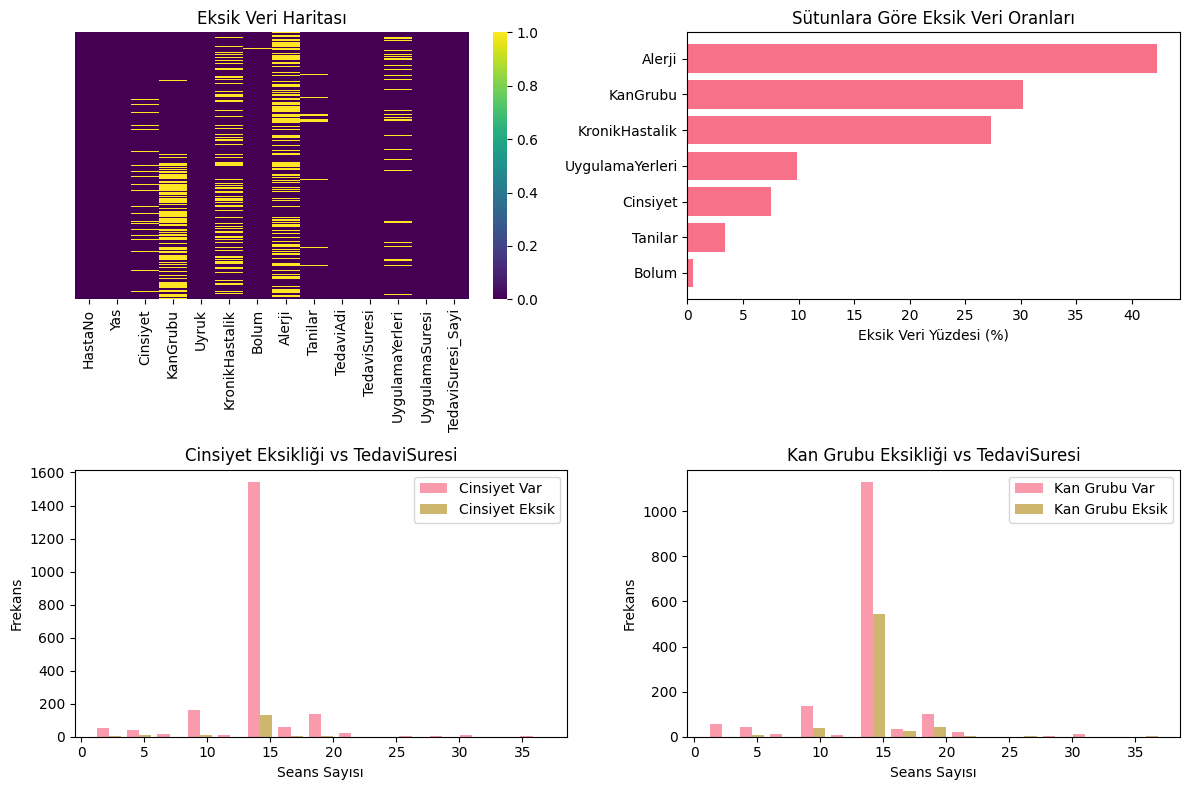

 Both Gender and Blood Type are missing: 71 kayıt
Both Allergy and Chronic Disease are missing: 210 kayıt


In [52]:

# Number and percentage of missing data
missing_data = pd.DataFrame({
    'Sütun': df.columns,
    'Eksik_Sayı': df.isnull().sum(),
    'Eksik_Yüzde': (df.isnull().sum() / len(df)) * 100
})

missing_data = missing_data.sort_values('Eksik_Yüzde', ascending=False)
print(missing_data)
print()

# Incomplete data visualisation
plt.figure(figsize=(12, 8))

# Missing data heatmap
plt.subplot(2, 2, 1)
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Eksik Veri Haritası')

# Missing data bar chart
plt.subplot(2, 2, 2)
missing_data_plot = missing_data[missing_data['Eksik_Yüzde'] > 0]
plt.barh(missing_data_plot['Sütun'], missing_data_plot['Eksik_Yüzde'])
plt.xlabel('Eksik Veri Yüzdesi (%)')
plt.title('Sütunlara Göre Eksik Veri Oranları')
plt.gca().invert_yaxis()

# Relationship between TreatmentTime and missing data
plt.subplot(2, 2, 3)
# Treatment Duration distribution of records with missing gender
cinsiyet_eksik = df[df['Cinsiyet'].isnull()]['TedaviSuresi_Sayi']
cinsiyet_var = df[df['Cinsiyet'].notnull()]['TedaviSuresi_Sayi']

plt.hist([cinsiyet_var, cinsiyet_eksik], label=['Cinsiyet Var', 'Cinsiyet Eksik'],
         alpha=0.7, bins=15)
plt.xlabel('Seans Sayısı')
plt.ylabel('Frekans')
plt.title('Cinsiyet Eksikliği vs TedaviSuresi')
plt.legend()

# Treatment Duration distribution of records with missing blood group
plt.subplot(2, 2, 4)
kan_eksik = df[df['KanGrubu'].isnull()]['TedaviSuresi_Sayi']
kan_var = df[df['KanGrubu'].notnull()]['TedaviSuresi_Sayi']

plt.hist([kan_var, kan_eksik], label=['Kan Grubu Var', 'Kan Grubu Eksik'],
         alpha=0.7, bins=15)
plt.xlabel('Seans Sayısı')
plt.ylabel('Frekans')
plt.title('Kan Grubu Eksikliği vs TedaviSuresi')
plt.legend()

plt.tight_layout()
plt.show()

# Missing data pattern analysis

print(f" Both Gender and Blood Type are missing: {df[(df['Cinsiyet'].isnull()) & (df['KanGrubu'].isnull())].shape[0]} kayıt")
print(f"Both Allergy and Chronic Disease are missing: {df[(df['Alerji'].isnull()) & (df['KronikHastalik'].isnull())].shape[0]} kayıt")

CATEGORICAL VARIABLE COMPLEXITY:
Cinsiyet: 2 benzersiz değer
KanGrubu: 8 benzersiz değer
Uyruk: 5 benzersiz değer
KronikHastalik: 220 benzersiz değer
Bolum: 10 benzersiz değer
Alerji: 38 benzersiz değer
Tanilar: 367 benzersiz değer
TedaviAdi: 244 benzersiz değer
UygulamaYerleri: 37 benzersiz değer
UygulamaSuresi: 10 benzersiz değer



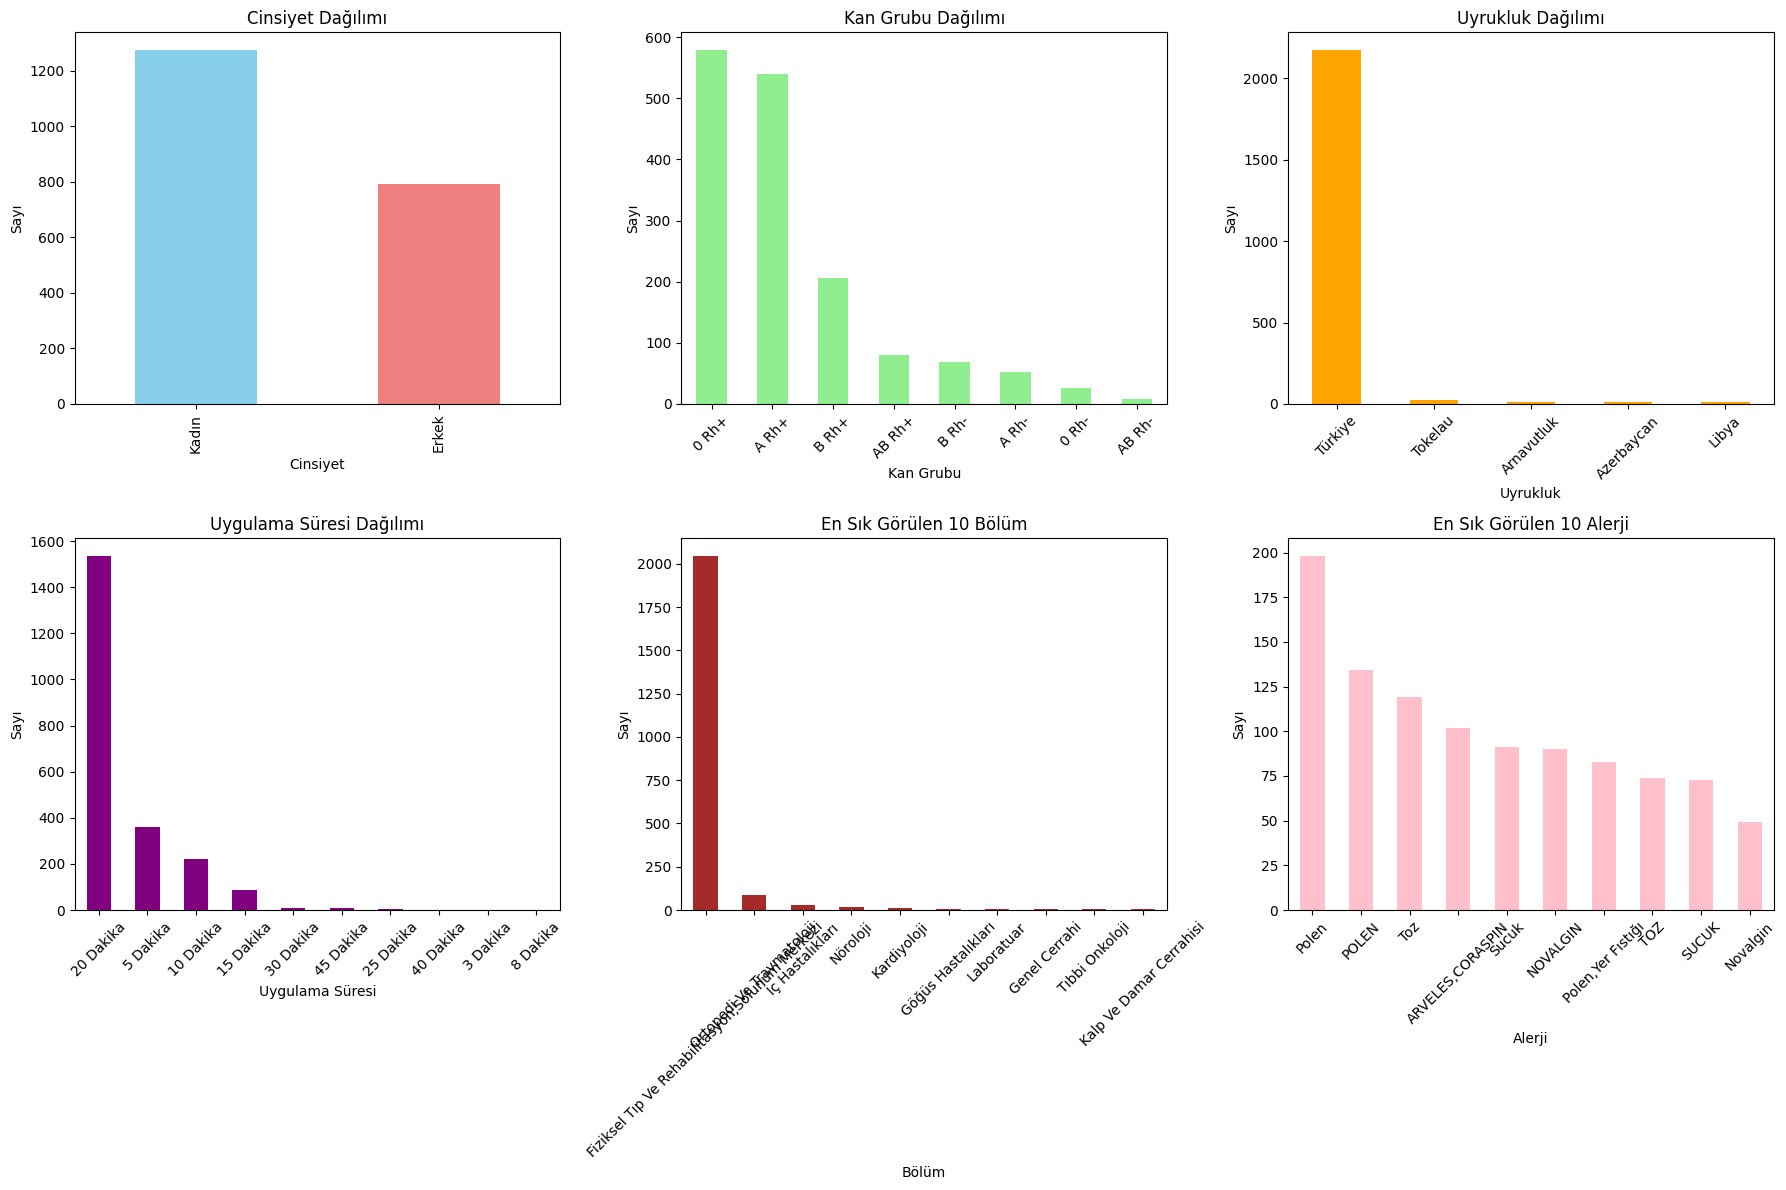

Average Treatment Duration by gender:
               mean       std  count
Cinsiyet                            
Erkek     14.406566  3.717095    792
Kadın     14.771586  3.772449   1274

Average Treatment Duration according to blood group:
               mean       std  count
KanGrubu                            
0 Rh+     14.411054  3.977047    579
0 Rh-     14.230769  5.544783     26
A Rh+     14.003704  4.333926    540
A Rh-     14.018868  3.466824     53
AB Rh+    14.350000  2.129361     80
AB Rh-    15.000000  0.000000      8
B Rh+     14.771845  3.776872    206
B Rh-     14.176471  3.095211     68

Average Treatment Duration by nationality:
                 mean       std  count
Uyruk                                 
Arnavutluk  12.230769  6.339740     13
Azerbaycan  11.083333  4.077841     12
Libya       20.000000  0.000000     10
Tokelau     20.185185  6.719873     27
Türkiye     14.509434  3.577159   2173


In [53]:

# Let's identify categorical variables
categorical_columns = ['Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum',
                       'Alerji', 'Tanilar', 'TedaviAdi', 'UygulamaYerleri', 'UygulamaSuresi']

# Number of unique values for each categorical variable
print("CATEGORICAL VARIABLE COMPLEXITY:")
for col in categorical_columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} benzersiz değer")
print()

# Let's analyse low cardinality variables in detail
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

df['Cinsiyet'].value_counts().plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral'])
axes[0].set_title('Cinsiyet Dağılımı')
axes[0].set_xlabel('Cinsiyet')
axes[0].set_ylabel('Sayı')


df['KanGrubu'].value_counts().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Kan Grubu Dağılımı')
axes[1].set_xlabel('Kan Grubu')
axes[1].set_ylabel('Sayı')
axes[1].tick_params(axis='x', rotation=45)


df['Uyruk'].value_counts().plot(kind='bar', ax=axes[2], color='orange')
axes[2].set_title('Uyrukluk Dağılımı')
axes[2].set_xlabel('Uyrukluk')
axes[2].set_ylabel('Sayı')
axes[2].tick_params(axis='x', rotation=45)

df['UygulamaSuresi'].value_counts().plot(kind='bar', ax=axes[3], color='purple')
axes[3].set_title('Uygulama Süresi Dağılımı')
axes[3].set_xlabel('Uygulama Süresi')
axes[3].set_ylabel('Sayı')
axes[3].tick_params(axis='x', rotation=45)

top_bolum = df['Bolum'].value_counts().head(10)
top_bolum.plot(kind='bar', ax=axes[4], color='brown')
axes[4].set_title('En Sık Görülen 10 Bölüm')
axes[4].set_xlabel('Bölüm')
axes[4].set_ylabel('Sayı')
axes[4].tick_params(axis='x', rotation=45)

top_alerji = df['Alerji'].value_counts().head(10)
top_alerji.plot(kind='bar', ax=axes[5], color='pink')
axes[5].set_title('En Sık Görülen 10 Alerji')
axes[5].set_xlabel('Alerji')
axes[5].set_ylabel('Sayı')
axes[5].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



print("Average Treatment Duration by gender:")
gender_treatment = df.groupby('Cinsiyet')['TedaviSuresi_Sayi'].agg(['mean', 'std', 'count'])
print(gender_treatment)
print()

print("Average Treatment Duration according to blood group:")
blood_treatment = df.groupby('KanGrubu')['TedaviSuresi_Sayi'].agg(['mean', 'std', 'count'])
print(blood_treatment)
print()

print("Average Treatment Duration by nationality:")
nationality_treatment = df.groupby('Uyruk')['TedaviSuresi_Sayi'].agg(['mean', 'std', 'count'])
print(nationality_treatment)

Average age: 47.33
Age median: 46.00
Age standard deviation: 15.21
The youngest patient: 2 yaş
The oldest patient: 92 yaş



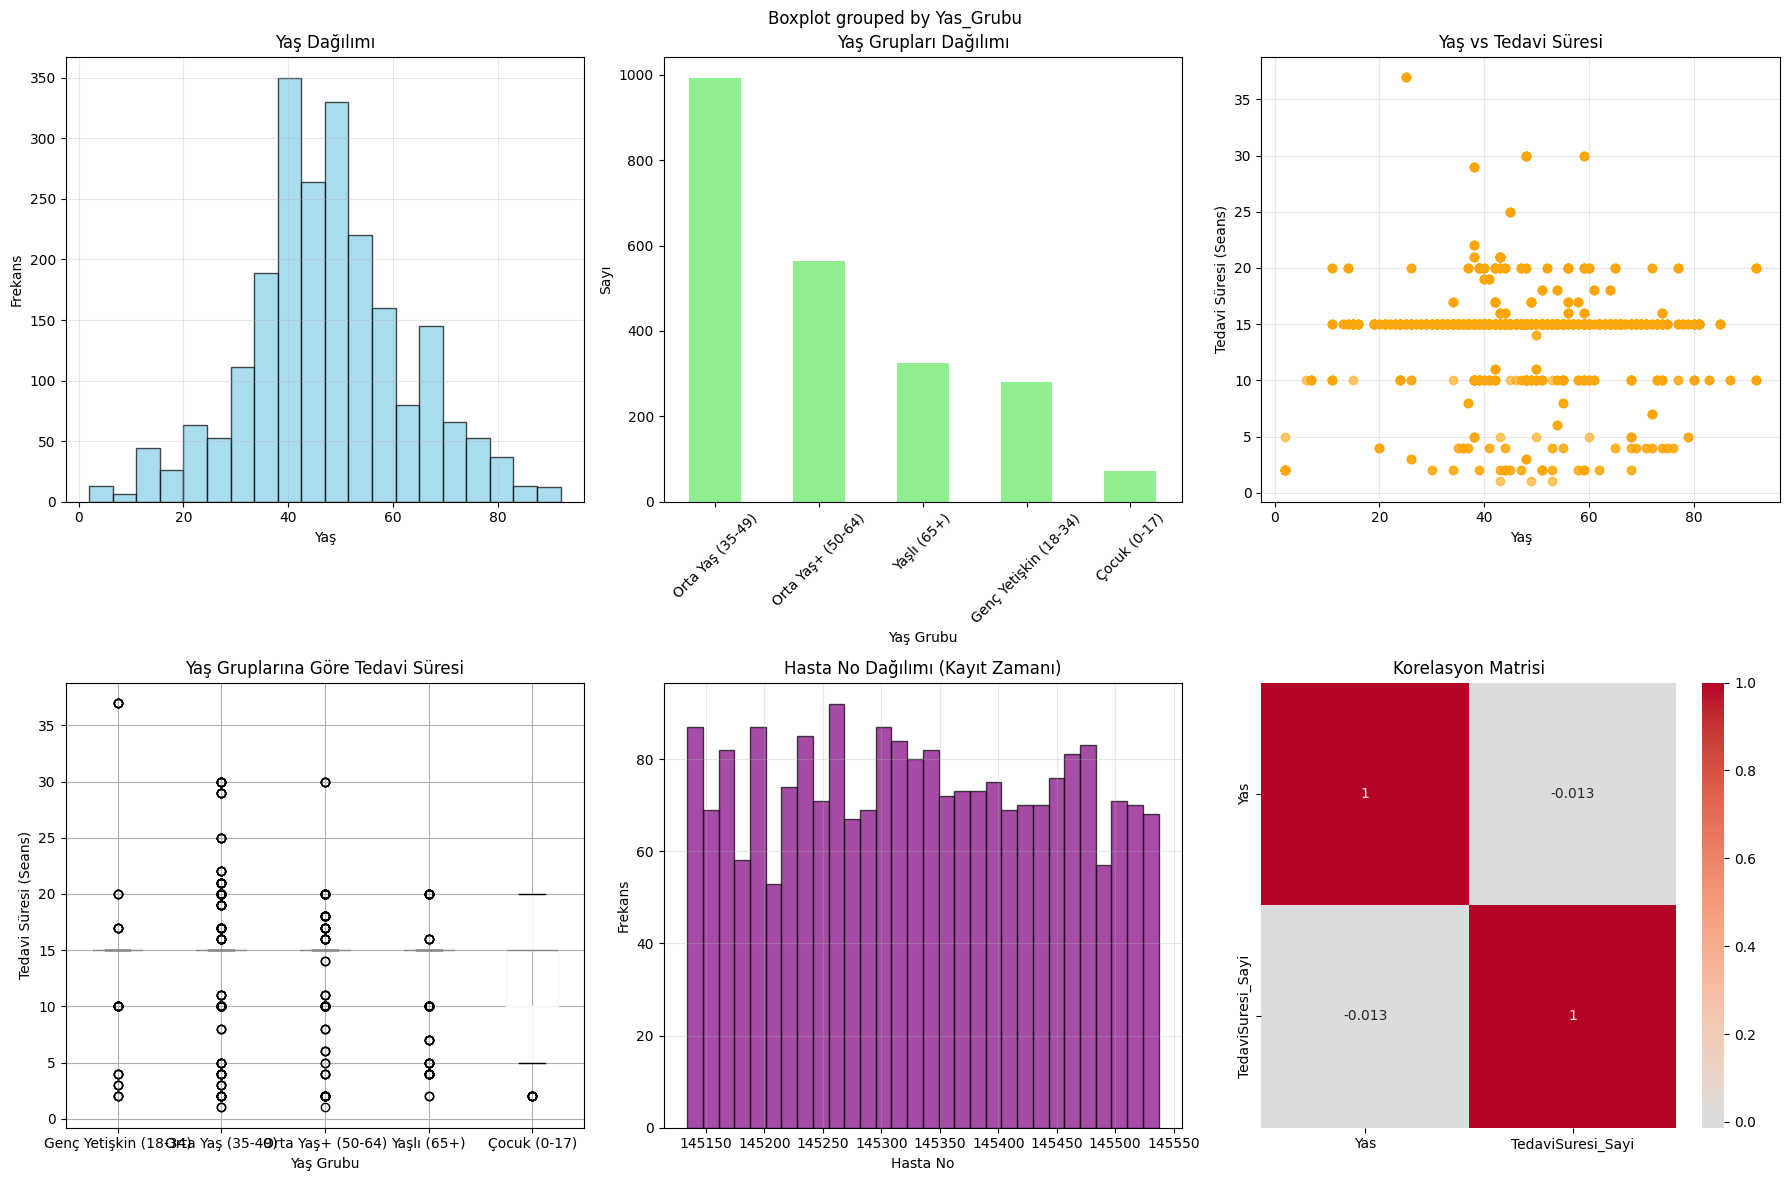

TREATMENT DURATION STATISTICS BY AGE GROUPS:
                       count       mean       std  min  max
Yas_Grubu                                                  
Genç Yetişkin (18-34)    280  14.778571  3.979460    2   37
Orta Yaş (35-49)         993  14.957704  3.567356    1   30
Orta Yaş+ (50-64)        565  14.513274  3.476147    1   30
Yaşlı (65+)              326  13.766871  3.670373    2   20
Çocuk (0-17)              71  12.492958  5.461222    2   20

CORRELATION ANALYSIS:
Correlation of Age and Treatment Duration: -0.0133

EXTREME VALUE ANALYSIS:
Outliers for age:
Age outlier count: 41

Outliers for Treatment Duration:
Treatment Time outlier count: 565


In [54]:


# Numeric variables
numerical_columns = ['HastaNo', 'Yas', 'TedaviSuresi_Sayi']

print(f"Average age: {df['Yas'].mean():.2f}")
print(f"Age median: {df['Yas'].median():.2f}")
print(f"Age standard deviation: {df['Yas'].std():.2f}")
print(f"The youngest patient: {df['Yas'].min()} yaş")
print(f"The oldest patient: {df['Yas'].max()} yaş")
print()

# Let's create age groups
def create_age_groups(age):
    if age < 18:
        return 'Çocuk (0-17)'
    elif age < 35:
        return 'Genç Yetişkin (18-34)'
    elif age < 50:
        return 'Orta Yaş (35-49)'
    elif age < 65:
        return 'Orta Yaş+ (50-64)'
    else:
        return 'Yaşlı (65+)'

df['Yas_Grubu'] = df['Yas'].apply(create_age_groups)

# Visualisations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Age distribution
axes[0, 0].hist(df['Yas'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_title('Yaş Dağılımı')
axes[0, 0].set_xlabel('Yaş')
axes[0, 0].set_ylabel('Frekans')
axes[0, 0].grid(True, alpha=0.3)

# Age groups
df['Yas_Grubu'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Yaş Grupları Dağılımı')
axes[0, 1].set_xlabel('Yaş Grubu')
axes[0, 1].set_ylabel('Sayı')
axes[0, 1].tick_params(axis='x', rotation=45)

# Yaş vs TedaviSuresi scatter plot
axes[0, 2].scatter(df['Yas'], df['TedaviSuresi_Sayi'], alpha=0.6, color='orange')
axes[0, 2].set_title('Yaş vs Tedavi Süresi')
axes[0, 2].set_xlabel('Yaş')
axes[0, 2].set_ylabel('Tedavi Süresi (Seans)')
axes[0, 2].grid(True, alpha=0.3)


df.boxplot(column='TedaviSuresi_Sayi', by='Yas_Grubu', ax=axes[1, 0])
axes[1, 0].set_title('Yaş Gruplarına Göre Tedavi Süresi')
axes[1, 0].set_xlabel('Yaş Grubu')
axes[1, 0].set_ylabel('Tedavi Süresi (Seans)')


axes[1, 1].hist(df['HastaNo'], bins=30, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].set_title('Hasta No Dağılımı (Kayıt Zamanı)')
axes[1, 1].set_xlabel('Hasta No')
axes[1, 1].set_ylabel('Frekans')
axes[1, 1].grid(True, alpha=0.3)

# Correlation matrix
numerical_df = df[['Yas', 'TedaviSuresi_Sayi']].corr()
sns.heatmap(numerical_df, annot=True, cmap='coolwarm', center=0, ax=axes[1, 2])
axes[1, 2].set_title('Korelasyon Matrisi')

plt.tight_layout()
plt.show()

print("TREATMENT DURATION STATISTICS BY AGE GROUPS:")
age_group_stats = df.groupby('Yas_Grubu')['TedaviSuresi_Sayi'].agg(['count', 'mean', 'std', 'min', 'max'])
print(age_group_stats)
print()

print("CORRELATION ANALYSIS:")
correlation = df['Yas'].corr(df['TedaviSuresi_Sayi'])
print(f"Correlation of Age and Treatment Duration: {correlation:.4f}")


print("\nEXTREME VALUE ANALYSIS:")
print("Outliers for age:")
Q1_age = df['Yas'].quantile(0.25)
Q3_age = df['Yas'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age
age_outliers = df[(df['Yas'] < lower_bound_age) | (df['Yas'] > upper_bound_age)]
print(f"Age outlier count: {len(age_outliers)}")

print("\nOutliers for Treatment Duration:")
Q1_treat = df['TedaviSuresi_Sayi'].quantile(0.25)
Q3_treat = df['TedaviSuresi_Sayi'].quantile(0.75)
IQR_treat = Q3_treat - Q1_treat
lower_bound_treat = Q1_treat - 1.5 * IQR_treat
upper_bound_treat = Q3_treat + 1.5 * IQR_treat
treat_outliers = df[(df['TedaviSuresi_Sayi'] < lower_bound_treat) | (df['TedaviSuresi_Sayi'] > upper_bound_treat)]
print(f"Treatment Time outlier count: {len(treat_outliers)}")

In [55]:
# Let's analyse high cardinality text fields
import re
from collections import Counter


KronikHastalik
Aritmi                           395
Hiportiroidizm                   383
Limb-Girdle Musküler Distrofi    379
Astım                            351
Hipertiroidizm                   327
Myastenia gravis                 316
Diyabet                          308
Duchenne Musküler Distrofisi     307
Fascioscapulohumeral Distrofi    304
Kalp yetmezliği                  301
Hipertansiyon                    285
Polimiyozit                      275
Becker Musküler Distrofisi       243
Guatr                              3
Hipotirodizm                       3
Name: count, dtype: int64
Tanilar
DORSALJİ                            695
DİĞER                               676
tanımlanmamış                       408
Omuzun darbe sendromu               272
İntervertebral disk bozuklukları    269
LUMBOSAKRAL BÖLGE                   265
SERVİKOTORASİK BÖLGE                211
SERVİKAL BÖLGE                      148
Eklem ağrısı                        113
Dorsalji                            

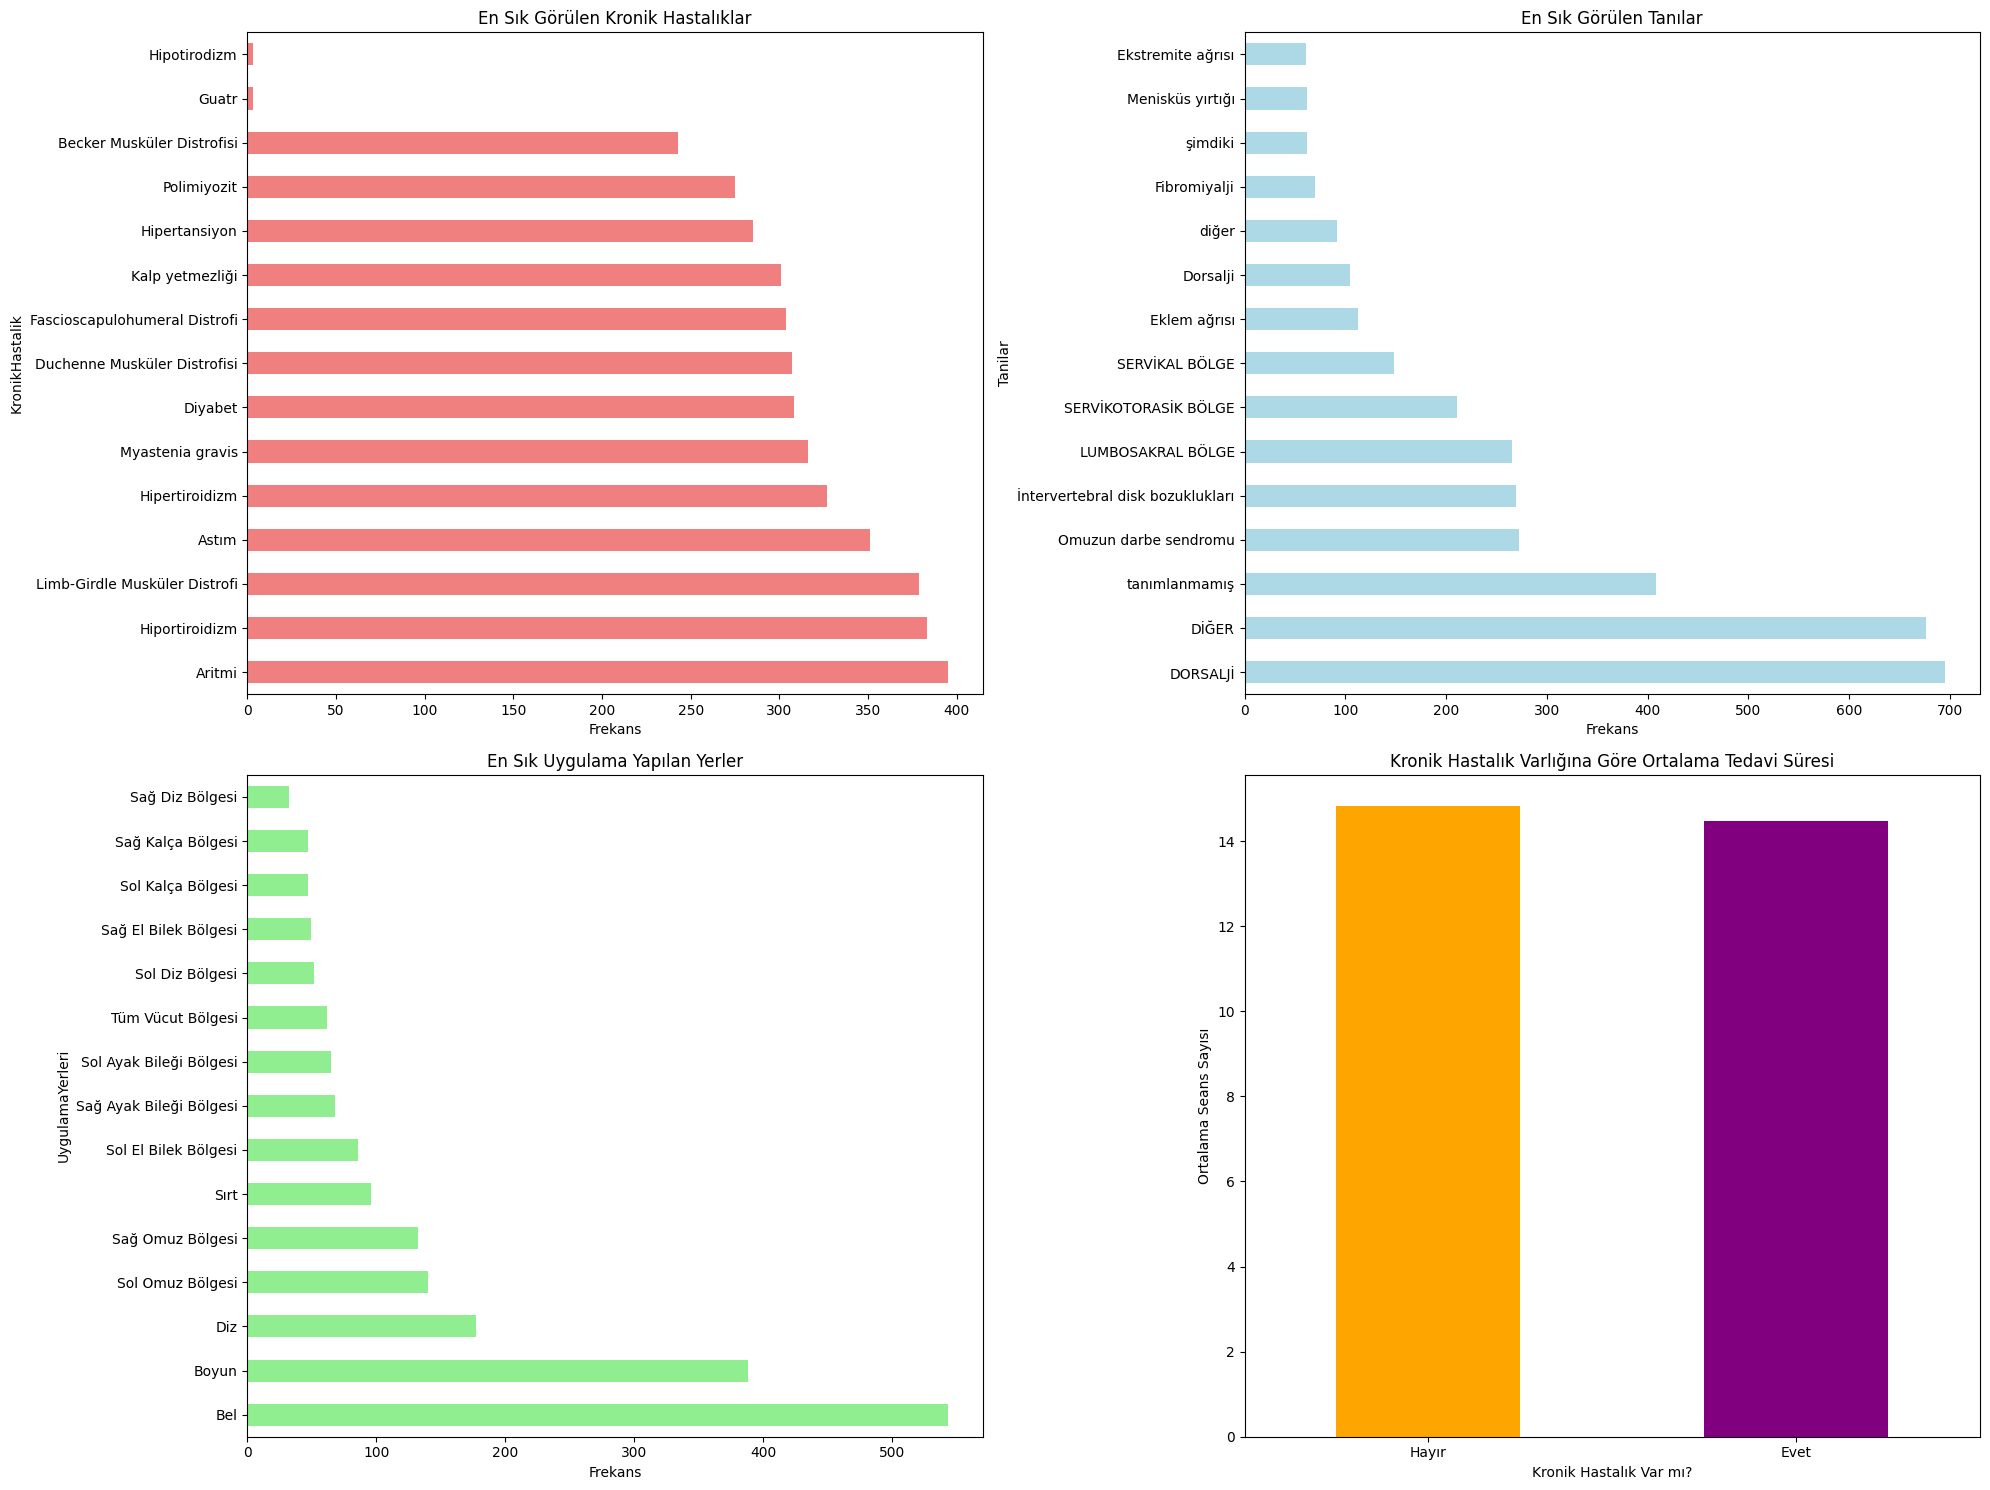

Alerji
Polen          330
POLEN          170
Toz            138
TOZ            121
NOVALGIN       110
ARVELES        102
CORASPIN       102
Sucuk           96
Yer Fıstığı     83
SUCUK           78
Name: count, dtype: int64
📊 YENİ FEATURE'LARIN TEDAVİ SÜRESİ İLE İLİŞKİSİ:
Kronik_Hastalik_Sayisi ile TedaviSuresi korelasyonu: -0.0195
Alerji_Sayisi ile TedaviSuresi korelasyonu: -0.0580
Uygulama_Yeri_Sayisi ile TedaviSuresi korelasyonu: 0.0511
• Kronik hastalığı olan hastaların ort. tedavi süresi: 14.48 seans
• Kronik hastalığı olmayan hastaların ort. tedavi süresi: 14.82 seans
• En fazla kronik hastalık sayısı: 4
• En fazla alerji sayısı: 2


In [56]:


kronik_list = df['KronikHastalik'].dropna().str.split(',').explode().str.strip()
kronik_counts = kronik_list.value_counts().head(15)

print(kronik_counts)



tani_list = df['Tanilar'].dropna().str.split(',').explode().str.strip()
tani_counts = tani_list.value_counts().head(15)

print(tani_counts)




uygulama_list = df['UygulamaYerleri'].dropna().str.split(',').explode().str.strip()
uygulama_counts = uygulama_list.value_counts().head(15)

print(uygulama_counts)


fig, axes = plt.subplots(2, 2, figsize=(20, 15))


kronik_counts.plot(kind='barh', ax=axes[0,0], color='lightcoral')
axes[0,0].set_title('En Sık Görülen Kronik Hastalıklar')
axes[0,0].set_xlabel('Frekans')


tani_counts.plot(kind='barh', ax=axes[0,1], color='lightblue')
axes[0,1].set_title('En Sık Görülen Tanılar')
axes[0,1].set_xlabel('Frekans')


uygulama_counts.plot(kind='barh', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('En Sık Uygulama Yapılan Yerler')
axes[1,0].set_xlabel('Frekans')

df['Kronik_Var'] = df['KronikHastalik'].notna()
kronik_tedavi = df.groupby('Kronik_Var')['TedaviSuresi_Sayi'].mean()
kronik_tedavi.plot(kind='bar', ax=axes[1,1], color=['orange', 'purple'])
axes[1,1].set_title('Kronik Hastalık Varlığına Göre Ortalama Tedavi Süresi')
axes[1,1].set_xlabel('Kronik Hastalık Var mı?')
axes[1,1].set_ylabel('Ortalama Seans Sayısı')
axes[1,1].set_xticklabels(['Hayır', 'Evet'], rotation=0)

plt.tight_layout()
plt.show()



alerji_list = df['Alerji'].dropna().str.split(',').explode().str.strip()
alerji_counts = alerji_list.value_counts().head(10)

print(alerji_counts)





df['Kronik_Hastalik_Sayisi'] = df['KronikHastalik'].fillna('').str.split(',').str.len()
df.loc[df['KronikHastalik'].isna(), 'Kronik_Hastalik_Sayisi'] = 0

df['Alerji_Sayisi'] = df['Alerji'].fillna('').str.split(',').str.len()
df.loc[df['Alerji'].isna(), 'Alerji_Sayisi'] = 0


df['Uygulama_Yeri_Sayisi'] = df['UygulamaYerleri'].fillna('').str.split(',').str.len()
df.loc[df['UygulamaYerleri'].isna(), 'Uygulama_Yeri_Sayisi'] = 0


print("📊 YENİ FEATURE'LARIN TEDAVİ SÜRESİ İLE İLİŞKİSİ:")
new_features = ['Kronik_Hastalik_Sayisi', 'Alerji_Sayisi', 'Uygulama_Yeri_Sayisi']

for feature in new_features:
    correlation = df[feature].corr(df['TedaviSuresi_Sayi'])
    print(f"{feature} ile TedaviSuresi korelasyonu: {correlation:.4f}")


print(f"• Kronik hastalığı olan hastaların ort. tedavi süresi: {df[df['Kronik_Var']==True]['TedaviSuresi_Sayi'].mean():.2f} seans")
print(f"• Kronik hastalığı olmayan hastaların ort. tedavi süresi: {df[df['Kronik_Var']==False]['TedaviSuresi_Sayi'].mean():.2f} seans")
print(f"• En fazla kronik hastalık sayısı: {df['Kronik_Hastalik_Sayisi'].max()}")
print(f"• En fazla alerji sayısı: {df['Alerji_Sayisi'].max()}")

In [57]:



print(f"Toplam kayıt: {len(df)}")
print(f"Toplam sütun: {len(df.columns)}")
print(f"Eksik veri olan sütun sayısı: {df.isnull().any().sum()}")
print()




gender_mode = df['Cinsiyet'].mode()[0]
print(f"• Cinsiyet: Mode imputation ({gender_mode}) - {df['Cinsiyet'].isnull().sum()} kayıt")


blood_mode = df['KanGrubu'].mode()[0]
print(f"• Kan Grubu: Mode imputation ({blood_mode}) - {df['KanGrubu'].isnull().sum()} kayıt")

print(f"• Kronik Hastalık: 'Kronik hastalık yok' kategorisi - {df['KronikHastalik'].isnull().sum()} kayıt")

print(f"• Alerji: 'Bilinen alerji yok' kategorisi - {df['Alerji'].isnull().sum()} kayıt")

print(f"• Uygulama Yerleri: Forward fill stratejisi - {df['UygulamaYerleri'].isnull().sum()} kayıt")


print(f"• Tanılar: 'Tanı belirtilmemiş' kategorisi - {df['Tanilar'].isnull().sum()} kayıt")

print()


df_processed = df.copy()


df_processed['Cinsiyet'].fillna(gender_mode, inplace=True)


df_processed['KanGrubu'].fillna(blood_mode, inplace=True)

df_processed['KronikHastalik'].fillna('Kronik hastalık yok', inplace=True)


df_processed['Alerji'].fillna('Bilinen alerji yok', inplace=True)


df_processed['Tanilar'].fillna('Tanı belirtilmemiş', inplace=True)

df_processed = df_processed.sort_values(['HastaNo', 'TedaviSuresi_Sayi'])
df_processed['UygulamaYerleri'] = df_processed.groupby('HastaNo')['UygulamaYerleri'].fillna(method='ffill')

uygulama_mode = df_processed['UygulamaYerleri'].mode()[0]
df_processed['UygulamaYerleri'].fillna(uygulama_mode, inplace=True)


bolum_mode = df_processed['Bolum'].mode()[0]
df_processed['Bolum'].fillna(bolum_mode, inplace=True)


missing_after = df_processed.isnull().sum()
print(missing_after[missing_after > 0])

if missing_after.sum() == 0:
    print("its okey")
else:
    print(f"{missing_after.sum()} eksik veri kaldi")

print(f"\ndata shape {df_processed.shape}")

Toplam kayıt: 2235
Toplam sütun: 19
Eksik veri olan sütun sayısı: 7

• Cinsiyet: Mode imputation (Kadın) - 169 kayıt
• Kan Grubu: Mode imputation (0 Rh+) - 675 kayıt
• Kronik Hastalık: 'Kronik hastalık yok' kategorisi - 611 kayıt
• Alerji: 'Bilinen alerji yok' kategorisi - 944 kayıt
• Uygulama Yerleri: Forward fill stratejisi - 221 kayıt
• Tanılar: 'Tanı belirtilmemiş' kategorisi - 75 kayıt

Series([], dtype: int64)
its okey

data shape (2235, 19)


In [58]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd



low_cardinality = ['Cinsiyet', 'KanGrubu', 'Uyruk', 'UygulamaSuresi']
medium_cardinality = ['Bolum', 'Alerji', 'UygulamaYerleri']
high_cardinality = ['KronikHastalik', 'Tanilar', 'TedaviAdi']

print(f"Düşük: {low_cardinality}")
print(f"Orta: {medium_cardinality}")
print(f"Yüksek: {high_cardinality}")
print()

df_encoded = df_processed.copy()


for col in low_cardinality:
    # One-hot encoding
    dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
    df_encoded = pd.concat([df_encoded, dummies], axis=1)
    print(f"{col}: {len(dummies.columns)} yeni sütun oluşturuldu")

print()


label_encoders = {}
for col in medium_cardinality:
    le = LabelEncoder()
    df_encoded[f'{col}_encoded'] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"{col}: {len(le.classes_)} sınıf encode edildi")

print()



top_chronic = ['Aritmi', 'Hiportiroidizm', 'Limb-Girdle Musküler Distrofi',
               'Astım', 'Hipertiroidizm', 'Myastenia gravis', 'Diyabet',
               'Duchenne Musküler Distrofisi']

for disease in top_chronic:
    df_encoded[f'Kronik_{disease}'] = df_encoded['KronikHastalik'].str.contains(disease, na=False).astype(int)

top_diagnoses = ['DORSALJİ', 'DİĞER', 'tanımlanmamış', 'Omuzun darbe sendromu',
                'İntervertebral disk bozuklukları', 'LUMBOSAKRAL BÖLGE']

for diagnosis in top_diagnoses:
    df_encoded[f'Tani_{diagnosis}'] = df_encoded['Tanilar'].str.contains(diagnosis, na=False).astype(int)

print(f"{len(top_chronic)} kronik hastalık binary feature'ı oluşturuldu")
print(f"{len(top_diagnoses)} tanı binary feature'ı oluşturuldu")
print()


df_encoded['UygulamaSuresi_Sayi'] = df_encoded['UygulamaSuresi'].str.extract('(\d+)').astype(int)

age_dummies = pd.get_dummies(df_encoded['Yas_Grubu'], prefix='Yas_Grubu', drop_first=True)
df_encoded = pd.concat([df_encoded, age_dummies], axis=1)

print(f"{len(age_dummies.columns)} yaş grubu dummy'si oluşturuldu")
print()


columns_to_drop = (low_cardinality + medium_cardinality + high_cardinality +
                  ['UygulamaSuresi', 'Yas_Grubu', 'TedaviSuresi'])

df_final = df_encoded.drop(columns=columns_to_drop, errors='ignore')

print(f"{len(columns_to_drop)} sütun kaldırıldı")
print(f"Final dataset boyutu: {df_final.shape}")
print()

print(f"• Başlangıç sütun sayısı: {df_processed.shape[1]}")
print(f"• Son sütun sayısı: {df_final.shape[1]}")
print(f"• Eklenen feature sayısı: {df_final.shape[1] - df_processed.shape[1]}")
print()

print(df_final.dtypes.value_counts())
print()

print(df_final.head())

Düşük: ['Cinsiyet', 'KanGrubu', 'Uyruk', 'UygulamaSuresi']
Orta: ['Bolum', 'Alerji', 'UygulamaYerleri']
Yüksek: ['KronikHastalik', 'Tanilar', 'TedaviAdi']

Cinsiyet: 1 yeni sütun oluşturuldu
KanGrubu: 7 yeni sütun oluşturuldu
Uyruk: 4 yeni sütun oluşturuldu
UygulamaSuresi: 9 yeni sütun oluşturuldu

Bolum: 10 sınıf encode edildi
Alerji: 39 sınıf encode edildi
UygulamaYerleri: 37 sınıf encode edildi

8 kronik hastalık binary feature'ı oluşturuldu
6 tanı binary feature'ı oluşturuldu

4 yaş grubu dummy'si oluşturuldu

13 sütun kaldırıldı
Final dataset boyutu: (2235, 50)

• Başlangıç sütun sayısı: 19
• Son sütun sayısı: 50
• Eklenen feature sayısı: 31

bool     26
int64    24
Name: count, dtype: int64

   HastaNo  Yas  TedaviSuresi_Sayi  Kronik_Var  Kronik_Hastalik_Sayisi  \
0   145134   60                  5        True                       3   
1   145135   28                 15        True                       4   
2   145135   28                 15        True                       4 

HastaNo: 0 outlier (%0.00)
Yas: 41 outlier (%1.83)
TedaviSuresi_Sayi: 565 outlier (%25.28)
Kronik_Hastalik_Sayisi: 0 outlier (%0.00)
Alerji_Sayisi: 0 outlier (%0.00)
Uygulama_Yeri_Sayisi: 295 outlier (%13.20)
UygulamaSuresi_Sayi: 12 outlier (%0.54)



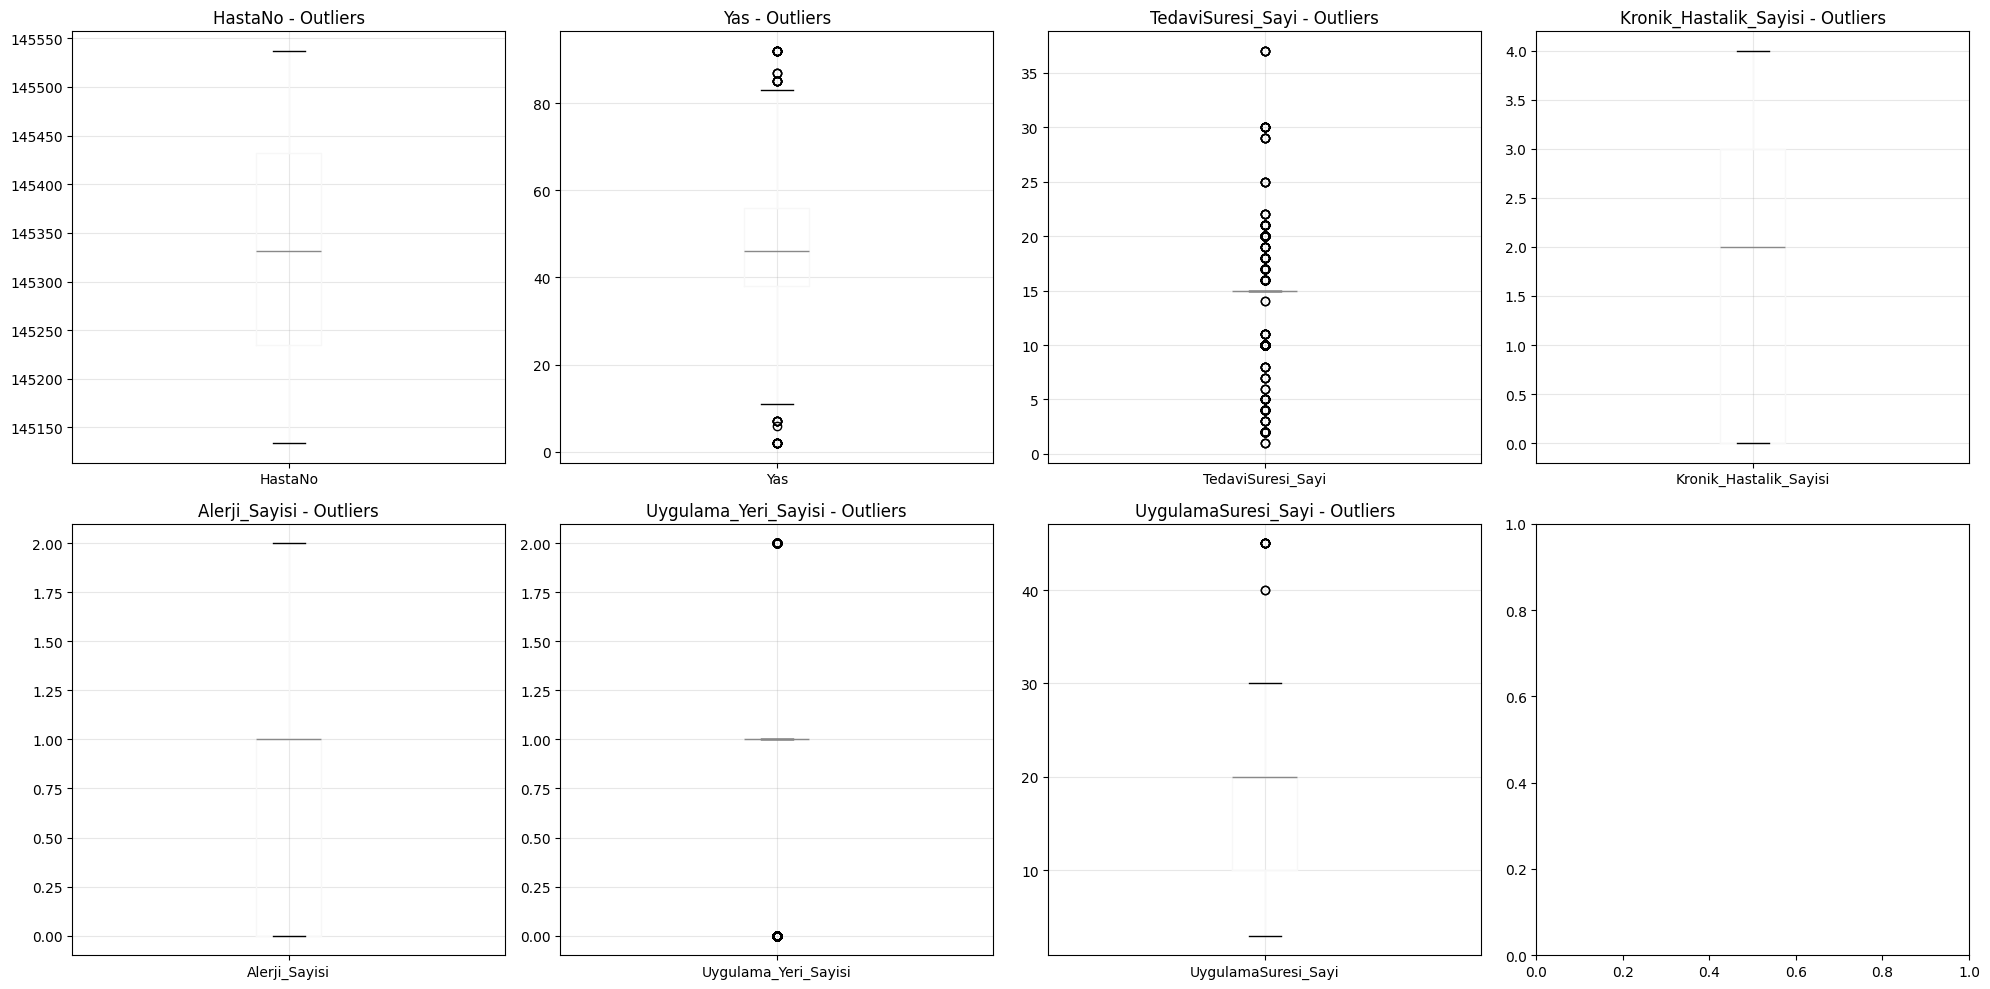

Binary/Categorical columns (scaling yok): 40
Numeric columns (scaling var): 6

            Yas  TedaviSuresi_Sayi  Kronik_Hastalik_Sayisi  Alerji_Sayisi  \
count  2235.000           2235.000                2235.000       2235.000   
mean     -0.000             -0.000                   0.000          0.000   
std       1.000              1.000                   1.000          1.000   
min      -2.986             -3.644                  -1.247         -1.032   
25%      -0.614              0.115                  -1.247         -1.032   
50%      -0.087              0.115                   0.086          0.401   
75%       0.572              0.115                   0.753          0.401   
max       2.813              6.022                   1.420          1.834   

       Uygulama_Yeri_Sayisi  UygulamaSuresi_Sayi  
count                2235.0             2235.000  
mean                    0.0               -0.000  
std                     0.0                1.000  
min                    

In [59]:


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
import numpy as np

numeric_columns = ['HastaNo', 'Yas', 'TedaviSuresi_Sayi', 'Kronik_Hastalik_Sayisi',
                   'Alerji_Sayisi', 'Uygulama_Yeri_Sayisi', 'UygulamaSuresi_Sayi']

outlier_info = {}

for col in numeric_columns:
    Q1 = df_final[col].quantile(0.25)
    Q3 = df_final[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_final[(df_final[col] < lower_bound) | (df_final[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df_final)) * 100

    outlier_info[col] = {
        'count': len(outliers),
        'percentage': outlier_percentage,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

    print(f"{col}: {len(outliers)} outlier (%{outlier_percentage:.2f})")

print()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        df_final.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'{col} - Outliers')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

df_outlier_handled = df_final.copy()

df_outlier_handled['Yas'] = df_outlier_handled['Yas'].clip(lower=2, upper=90)

# Diğer numerik değişkenler için capping
for col in ['Kronik_Hastalik_Sayisi', 'Alerji_Sayisi', 'Uygulama_Yeri_Sayisi']:
    Q1 = df_outlier_handled[col].quantile(0.25)
    Q3 = df_outlier_handled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_outlier_handled[col] = df_outlier_handled[col].clip(lower=lower_bound, upper=upper_bound)





# Scaling için sütunları ayır
# Binary/categorical columns (0/1 values)
binary_columns = [col for col in df_outlier_handled.columns if
                 df_outlier_handled[col].dtype == 'bool' or
                 (df_outlier_handled[col].nunique() == 2 and set(df_outlier_handled[col].unique()).issubset({0, 1, True, False}))]

# Numeric columns - scaling
numeric_to_scale = [col for col in numeric_columns if col != 'HastaNo']  # HastaNo'yu scale etme

print(f"Binary/Categorical columns (scaling yok): {len(binary_columns)}")
print(f"Numeric columns (scaling var): {len(numeric_to_scale)}")
print()

# StandardScaler uygula
scaler = StandardScaler()
df_scaled = df_outlier_handled.copy()

df_scaled[numeric_to_scale] = scaler.fit_transform(df_outlier_handled[numeric_to_scale])



scaling_stats = df_scaled[numeric_to_scale].describe()
print(scaling_stats.round(3))
print()


X = df_scaled.drop(['TedaviSuresi_Sayi'], axis=1)
y = df_scaled['TedaviSuresi_Sayi']

print(f"Feature matrix (X): {X.shape}")
print(f"Target vector (y): {y.shape}")
print(f"Toplam feature sayısı: {X.shape[1]}")

print("HEDEF DEĞİŞKEN İLE KORELASYON ANALİZİ:")
correlations = []
for col in X.columns:
    if X[col].dtype in ['int64', 'float64']:
        corr = X[col].corr(y)
        correlations.append((col, abs(corr), corr))

correlations.sort(key=lambda x: x[1], reverse=True)
print("The 10 most highly correlated features:")
for i, (feature, abs_corr, corr) in enumerate(correlations[:10]):
    print(f"{i+1:2d}. {feature:<30}: {corr:6.3f}")

print(f"Final dataset: {X.shape[0]} registration, {X.shape[1]} feature")

In [60]:


print("DATA QUALITY CONTROL:")
print(f"• Missing data: {X.isnull().sum().sum()} ")
print(f"• Duplicate record: {X.duplicated().sum()}")
print(f"• Data type consistency: {len(X.dtypes.unique())}")
print(f"• Target variable distribution: {y.min():.1f} - {y.max():.1f}")
print()

print(f"• Original number of columns: 13")
print(f"• Number of processed features: {X.shape[1]}")
print(f"• Binary features: {len([col for col in X.columns if X[col].dtype == 'bool'])}")
print(f"• Sayısal özellikler: {len([col for col in X.columns if X[col].dtype in ['int64', 'float64']])}")
print()

#  ENCODING summary
encoding_summary = {
    "One-Hot Encoded": ["Cinsiyet", "KanGrubu", "Uyruk", "UygulamaSuresi", "Yas_Grubu"],
    "Label Encoded": ["Bolum", "Alerji", "UygulamaYerleri"],
    "Binary Features": ["Kronik hastalıklar (8 adet)", "Tanılar (6 adet)"],
    "Numeric Features": ["Yaş", "TedaviSuresi", "Sayısal aggregations"]
}

for method, features in encoding_summary.items():
    print(f"• {method}: {len(features)} grup")


DATA QUALITY CONTROL:
• Missing data: 0 
• Duplicate record: 1138
• Data type consistency: 3
• Target variable distribution: -3.6 - 6.0

• Original number of columns: 13
• Number of processed features: 49
• Binary features: 26
• Sayısal özellikler: 23

• One-Hot Encoded: 5 grup
• Label Encoded: 3 grup
• Binary Features: 2 grup
• Numeric Features: 3 grup


In [61]:

df_final.to_csv('processed_dataset.csv', index=False)


df_final.to_excel('processed_dataset.xlsx', index=False)